# Q1

## Qual o numero de clusters mais adequado para os dados em agrupamento_Q1.csv, e quais os centroides desses clusters, usando os centroides em agrup_centroides_Q1.csv e KMeans?

In [74]:
import pandas as pd
import numpy as np  

In [75]:
# Carregar os dados de agrupamento e centroides
data_path = 'agrupamento_Q1.csv'
centroids_path = 'agrup_centroides_Q1.csv'

# Lendo os dados
data = pd.read_csv(data_path)
initial_centroids = pd.read_csv(centroids_path)

# Exibindo as primeiras linhas de cada DataFrame para verificar a estrutura e a coluna "Unnamed"
data.head(), initial_centroids.head()


(             X1            X2            X3            X4
 0 -0.0757008393  0.4708570523  0.1331388633 -0.1529003891
 1 -0.3285611144  0.4273233755 -0.1812366250 -0.1730409679
 2 -0.4707268604 -0.1505147583  0.0009539430  0.0709372311
 3 -0.2800369020 -0.2505871458 -0.2165871026 -0.3724296395
 4 -0.1393586349 -0.1249656170  0.0812837431  0.0839137659,
    Unnamed: 0            X1            X2           X3            X4
 0           1  1.4885312967 -0.4305859646 0.2089417569  0.0184851949
 1           2  0.1493914217  1.5495347811 0.2196876333  0.9178544767
 2           3  1.2767137888  0.8444999390 1.2119062520 -0.4947813613
 3           4 -0.2241716190 -0.2652523285 1.0043671124 -0.2097406821
 4           5  0.0595756452  0.9461014886 1.1140058412  0.4010511969)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Passo 1: Carregar os dados
data = pd.read_csv(data_path)
initial_centroids = pd.read_csv(centroids_path).drop(columns=["Unnamed: 0"])

# Passo 2: Padronizar os dados de agrupamento
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Passo 3: Padronizar os centroides iniciais com o mesmo scaler
initial_centroids_scaled = scaler.transform(initial_centroids)

# Passo 4: Executar o KMeans com centroides iniciais padronizados
kmeans = KMeans(n_clusters=initial_centroids_scaled.shape[0], init=initial_centroids_scaled, n_init=1, max_iter=300)
kmeans.fit(data_scaled)

# Passo 5: Reescalar os centroides para a escala original
final_centroids_rescaled = scaler.inverse_transform(kmeans.cluster_centers_)
final_centroids_rescaled



array([[ 1.06107649, -0.08986488, -0.07083674,  0.84348278],
       [ 0.9478659 , -0.09151233,  0.04748808,  1.15404909],
       [ 0.94283352,  0.89034184,  0.91159879, -0.18010822],
       [ 0.78846786, -0.11948122,  1.0011551 ,  0.13673767],
       [ 1.04332697,  1.23370712,  0.98391248, -0.03201016],
       [-0.03471473,  0.01631629,  0.01042648, -0.01624075],
       [ 0.99747646,  0.91447102,  1.02349256,  0.19988572],
       [ 1.24506605,  0.06557562,  0.95795107,  0.08013907],
       [ 1.00064193,  0.23912211, -0.02332997,  0.89624312],
       [ 0.8699984 ,  0.20869318,  0.92579369, -0.06692597],
       [ 1.03587754, -0.15883719,  1.09234133, -0.12883468],
       [ 1.00798994, -0.00584577, -0.01194893,  0.01547918]])

In [77]:
from sklearn.metrics import silhouette_score
import numpy as np

# Faixa de números de clusters a testar
cluster_range = range(2, 15)

# Listas para armazenar os resultados do Método do Cotovelo e da Análise da Silhueta
wcss = []
silhouette_scores = []

# Loop sobre a faixa de números de clusters para calcular WCSS e scores de silhueta
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Soma dos quadrados dentro dos clusters
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Preparando dados para retornar
wcss, silhouette_scores


([2570.1786698355636,
  1700.4735462925905,
  1109.3114507133878,
  743.9407048204572,
  711.4880070079528,
  678.9973790916615,
  648.095891917936,
  621.1297107014923,
  596.4945384386015,
  568.1444807073094,
  544.6922552506999,
  525.5548273463876,
  508.3394505669279],
 [0.346484407727081,
  0.41516149332485464,
  0.4525716972553341,
  0.48833078709521566,
  0.41927504230251167,
  0.3657493242733979,
  0.312879497397396,
  0.2308975128397437,
  0.24947828382914744,
  0.19320912856816386,
  0.19589396156357183,
  0.1960536383763771,
  0.19112038888129657])

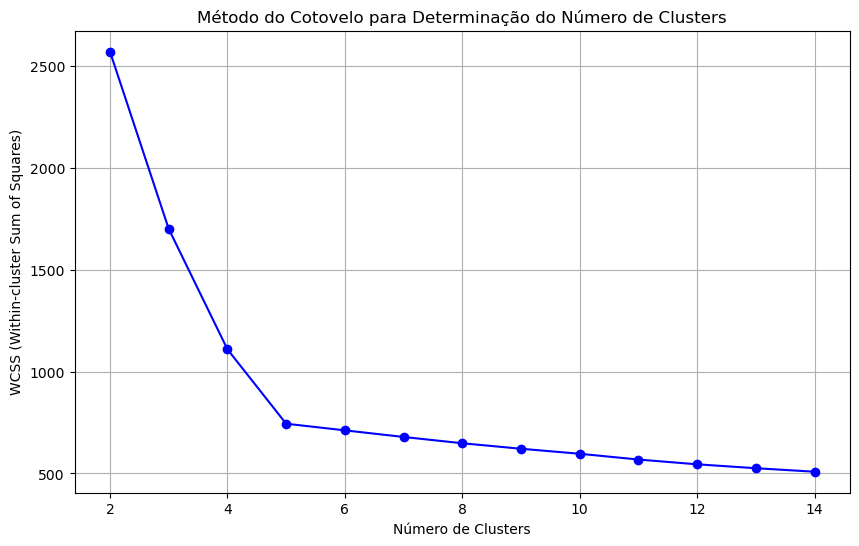

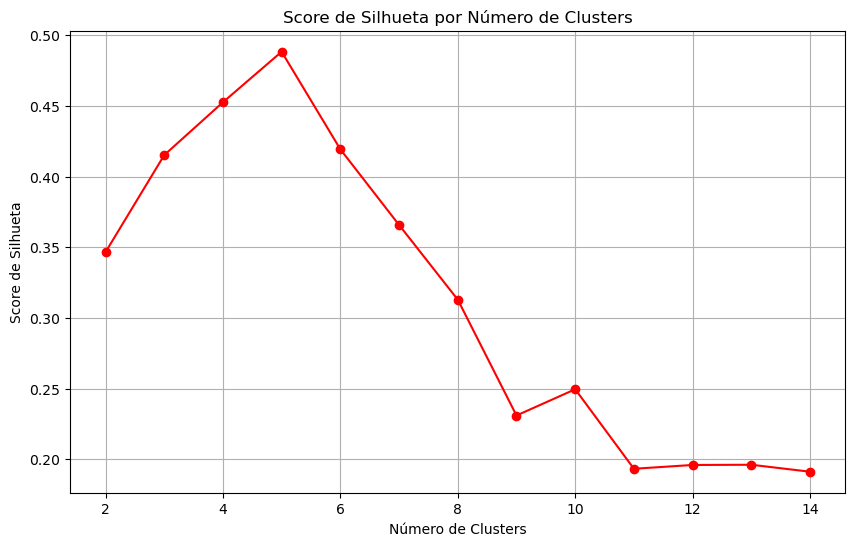

In [78]:
import matplotlib.pyplot as plt

# Plotar o Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Plotar a Análise da Silhueta
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='r')
plt.title('Score de Silhueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhueta')
plt.grid(True)
plt.show()



In [79]:

# Executar KMeans com 5 clusters, pois foi o melhor segundo a Análise da Silhueta
kmeans_best = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_best.fit(data_scaled)


KMeans(n_clusters=5, n_init=10, random_state=42)

In [80]:

# Centroides e rótulos dos clusters para 5 clusters
final_centroids_best = scaler.inverse_transform(kmeans_best.cluster_centers_)
cluster_labels = kmeans_best.labels_


In [81]:
final_centroids_best, cluster_labels

(array([[-3.47147275e-02,  1.63162909e-02,  1.04264751e-02,
         -1.62407503e-02],
        [ 9.90740088e-01,  9.93047773e-01,  9.69936615e-01,
         -4.06482259e-03],
        [ 9.95561737e-01,  6.26153151e-04, -7.80409753e-03,
          1.00152120e+00],
        [ 1.00809727e+00,  5.65625680e-03, -6.05882233e-03,
          2.93292716e-02],
        [ 9.95952697e-01,  6.46273222e-03,  9.99718008e-01,
          3.14721258e-03]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [82]:
# Criar um DataFrame com os centroides
centroid_df = pd.DataFrame(final_centroids_best, columns=['X1', 'X2', 'X3', 'X4'])

# Atribuir nomes aos clusters para facilitar a visualização
centroid_df.index = [f'Cluster {i+1}' for i in range(5)]

# Exibir o DataFrame
centroid_df


,X1,X2,X3,X4
Cluster 1,-0.0347147275,0.0163162909,0.0104264751,-0.0162407503
Cluster 2,0.9907400882,0.9930477735,0.9699366149,-0.0040648226
Cluster 3,0.9955617371,0.0006261532,-0.0078040975,1.0015212002
Cluster 4,1.0080972680,0.0056562568,-0.0060588223,0.0293292716
Cluster 5,0.9959526972,0.0064627322,0.9997180082,0.0031472126


---

Usando Kmedeoids

In [83]:
%pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn_extra.cluster import KMedoids

# Configurando o KMedoids
kmedoids = KMedoids(n_clusters=5, metric='euclidean', method='alternate', random_state=42)

# Ajustando o modelo aos dados padronizados
kmedoids.fit(data_scaled)

# Os medoids finais (reescalados para a escala original)
final_medoids = scaler.inverse_transform(kmedoids.cluster_centers_)

# Os rótulos dos clusters
cluster_labels = kmedoids.labels_


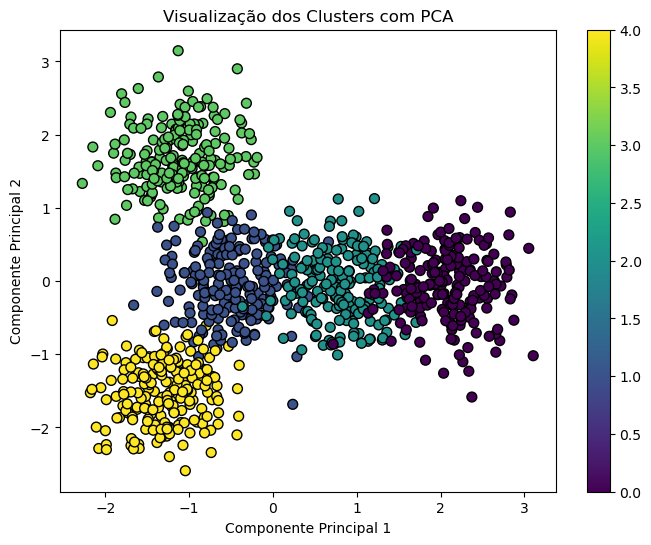

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzindo a dimensionalidade para 2D
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Plotar os clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmedoids.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()


In [86]:
# Coordenadas dos medoids no espaço de dados padronizado
medoids_scaled = data_scaled[kmedoids.medoid_indices_]

# Reescalar para a escala original
medoids_original = scaler.inverse_transform(medoids_scaled)


In [87]:
# Criar DataFrame para os medoids
medoids_df = pd.DataFrame(medoids_original, columns=data.columns)
medoids_df.index = [f'Cluster {i+1}' for i in range(len(medoids_original))]

# Exibir o DataFrame
medoids_df

,X1,X2,X3,X4
Cluster 1,0.9882398974,0.9360661738,1.0135408443,-0.0437402900
Cluster 2,0.9242592553,0.0228493897,-0.0083127076,0.0394038063
Cluster 3,1.0302604089,0.0554889415,0.9522366557,-0.0350027292
Cluster 4,-0.0014280909,-0.0158575741,-0.0179696499,0.0817624799
Cluster 5,0.9649121785,0.0913482034,-0.0242873867,1.0603069823


---

Usando BDCSAN

In [88]:
from sklearn.cluster import DBSCAN

# Configurando e executando o DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)

# Rótulos dos clusters
cluster_labels = dbscan.labels_

# Identificar os pontos de ruído
noise_points = (cluster_labels == -1)

# Exibir os rótulos dos clusters e os pontos de ruído
print("Rótulos dos Clusters:", cluster_labels)
print("Pontos de Ruído:", noise_points.sum())


Rótulos dos Clusters: [ 0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0  0  1  1  1  1  1 -1  2  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  2 -1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  

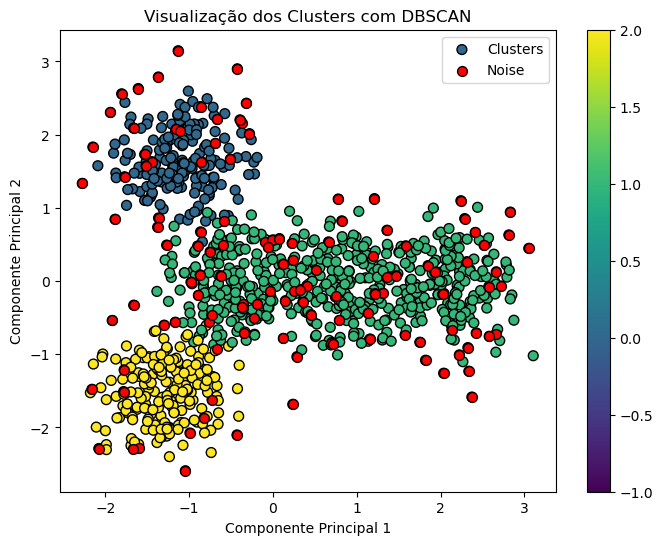

In [89]:
# Reduzindo a dimensionalidade para 2D para visualização
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Plotar os clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=dbscan.labels_, cmap='viridis', edgecolor='k', s=50, label='Clusters')
plt.scatter(data_reduced[noise_points, 0], data_reduced[noise_points, 1], color='red', s=50, edgecolor='k', label='Noise')
plt.title('Visualização dos Clusters com DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.legend()
plt.show()


---

Com GMM

In [90]:
from sklearn.mixture import GaussianMixture

# Configurando e executando o GMM
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(data_scaled)

# Rótulos dos clusters
cluster_labels = gmm.predict(data_scaled)

# Centroides (médias das componentes gaussianas)
centroids = gmm.means_

# Desnormalizar os centroides para a escala original dos dados
centroids_original = scaler.inverse_transform(centroids)


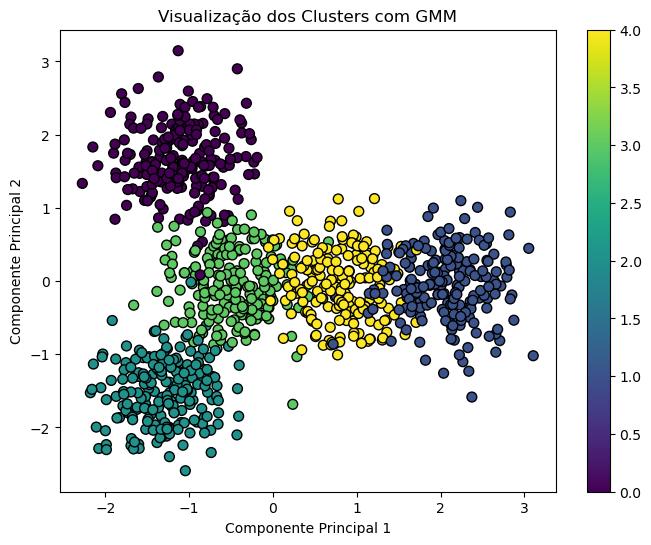

In [91]:
# Reduzindo a dimensionalidade para 2D para visualização
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Plotar os clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Visualização dos Clusters com GMM')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()


In [92]:
import pandas as pd

# Criar DataFrame para os centroides
centroid_df = pd.DataFrame(centroids_original, columns=data.columns)
centroid_df.index = [f'Cluster {i+1}' for i in range(5)]

# Exibir o DataFrame
centroid_df


,X1,X2,X3,X4
Cluster 1,-0.0271894335,0.0161647986,0.0110708383,-0.0127712467
Cluster 2,0.9893929646,0.9919111313,0.9712563067,-0.0032848048
Cluster 3,0.9939534314,0.0018498698,-0.0073229456,0.9990709525
Cluster 4,1.0155910770,0.0025152058,-0.0009315068,0.0271010247
Cluster 5,0.9970033270,0.0093257030,1.0021581380,0.0005643727


# Q3

## Use naive-bayes com validação holdout, para descobrir a acuracia media dos conjuntos de treino e validação nos dados no arquivo classificacao_Q3.csv. O tamanho do conjunto de validação é 500.

In [93]:
import pandas as pd

# Carregar os dados do arquivo CSV
data_path = 'classificacao_Q3.csv'
data = pd.read_csv(data_path)

# Mostrar as primeiras linhas e informações sobre os dados
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genero        1000 non-null   object
 1   Idade         1000 non-null   object
 2   Escolaridade  1000 non-null   object
 3   Profissao     1000 non-null   object
 4   Target        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


(  Genero             Idade Escolaridade Profissao  Target
 0      F  a - Ate 25 anos   Fundamental         b       0
 1      M  a - Ate 25 anos         Medio         d       1
 2      F  c - 36 a 45 anos  Fundamental         a       1
 3      M  d - 46 a 55 anos  Fundamental         a       0
 4      F  c - 36 a 45 anos  Fundamental         b       1,
 None)

In [94]:
data.describe() 

,Target
count,1000.0000000000
mean,0.7720000000
std,0.4197525369
min,0.0000000000
25%,1.0000000000
50%,1.0000000000
75%,1.0000000000
max,1.0000000000


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Codificar as variáveis categóricas
encoder = LabelEncoder()
for column in data.columns[:-1]:  # Excluir a coluna 'Target'
    data[column] = encoder.fit_transform(data[column])

# Dividir os dados em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=500, random_state=42)

# Instanciar e treinar o modelo Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Avaliar a acurácia no conjunto de treinamento e validação
train_accuracy = accuracy_score(y_train, model.predict(X_train))
val_accuracy = accuracy_score(y_val, model.predict(X_val))

train_accuracy, val_accuracy


(0.826, 0.754)

---

Utilizando k-fold

In [96]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Carregar os dados
data_path = 'classificacao_Q3.csv'
data = pd.read_csv(data_path)

# Codificar as variáveis categóricas
encoder = LabelEncoder()
for column in data.columns[:-1]:  # Excluir a coluna 'Target'
    data[column] = encoder.fit_transform(data[column])

# Instanciar o modelo Naive Bayes
model = CategoricalNB()

# Configurar a validação cruzada k-fold
k_folds = 10
kf = KFold(n_splits=k_folds)

# Preparar para armazenar os resultados de cada fold
train_accuracies = []
test_accuracies = []

# Executar a validação cruzada manual
for train_index, test_index in kf.split(data):
    X_train, X_test = data.drop('Target', axis=1).iloc[train_index], data.drop('Target', axis=1).iloc[test_index]
    y_train, y_test = data['Target'].iloc[train_index], data['Target'].iloc[test_index]
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Avaliar o modelo no conjunto de treinamento
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    train_accuracies.append(train_accuracy)

    # Avaliar o modelo no conjunto de teste
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    test_accuracies.append(test_accuracy)

# Calcular as acurácias médias
average_train_accuracy = sum(train_accuracies) / len(train_accuracies)
average_test_accuracy = sum(test_accuracies) / len(test_accuracies)

print("Acurácia Média no Treinamento:", average_train_accuracy)
print("Acurácia Média no Teste:", average_test_accuracy)


Acurácia Média no Treinamento: 0.7901111111111112
Acurácia Média no Teste: 0.788


---

# Q4

## Usando 10-fold cross validation, use um modelo KNN (k=15, distancia euclidiana), para descobrir a acurácia média de validação dos dados em classificacao_Q4.csv.

In [97]:
import pandas as pd

# Carregar o arquivo CSV
file_path = 'classificacao_Q4.csv'
data = pd.read_csv(file_path)

# Mostrar as primeiras linhas do DataFrame e informações sobre os dados
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 101 entries, x0 to target
dtypes: float64(101)
memory usage: 1.2 MB


(             x0            x1            x2            x3            x4  \
 0  1.6961993232 -0.7925983944 -0.3494268850 -0.4645598909  3.1870139896   
 1 -0.2366956703 -2.2023422897  0.0240225946  1.4977000207 -0.0697577580   
 2 -0.4366832997  1.5638164292 -0.8959988750 -0.5804250827  0.3110596272   
 3  1.4259082862  0.4000550646 -0.3050380528 -0.9302505834 -2.2145494316   
 4 -0.1861557200 -0.9757641838  0.5946602668 -1.1819802355 -1.4434140208   
 
              x5            x6            x7            x8            x9  ...  \
 0  0.0359762720  1.0332735088 -1.5049681216  0.2046934420  1.6912036379  ...   
 1 -2.4670881133  1.1265287992 -0.5705573809  2.0792514684 -1.8826317837  ...   
 2 -0.1873686251  0.8052490958 -2.3995216977 -0.5788179102  1.5869808748  ...   
 3  1.7633789568 -0.2398682210 -2.0588909355 -1.0065328147 -2.1568393206  ...   
 4 -0.7976505699 -1.2526080974 -0.0604523394  0.1307020076 -2.3435174448  ...   
 
             x91           x92          x93           

In [98]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Carregar os dados
data = pd.read_csv('classificacao_Q4.csv')

# Separar as variáveis independentes e a variável dependente
X = data.drop('target', axis=1)
y = data['target']

# Criar um pipeline que primeiro padroniza os dados e depois aplica o KNN
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15, metric='euclidean'))

# Aplicar cross-validation
scores = cross_val_score(pipeline, X, y, cv=10)  # cv=10 para 10-fold cross-validation

# Imprimir a acurácia de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Acurácia do fold {i}: {score:.3f}")

# Calcular a acurácia média
average_accuracy = scores.mean()

print("Acurácia média usando 10-fold cross-validation:", average_accuracy)


Acurácia do fold 1: 0.593
Acurácia do fold 2: 0.567
Acurácia do fold 3: 0.607
Acurácia do fold 4: 0.507
Acurácia do fold 5: 0.447
Acurácia do fold 6: 0.560
Acurácia do fold 7: 0.580
Acurácia do fold 8: 0.580
Acurácia do fold 9: 0.540
Acurácia do fold 10: 0.480
Acurácia média usando 10-fold cross-validation: 0.546


In [99]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Carregar os dados
data = pd.read_csv('classificacao_Q4.csv')
X = data.drop('target', axis=1)
y = data['target']

# Definir uma função para testar diferentes configurações
def test_knn_configurations(X, y, k_values, metrics, cv_folds=10):
    results = []
    for k in k_values:
        for metric in metrics:
            pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k, metric=metric))
            cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
            scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
            results.append((k, metric, scores.mean()))
    return results

# Configurações para testar
k_values = [5, 10, 15, 20, 25]  # Diferentes valores de k
metrics = ['euclidean', 'manhattan']  # Diferentes métricas de distância

# Testar as configurações
results = test_knn_configurations(X, y, k_values, metrics)

# Mostrar os resultados
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)
for result in results_sorted:
    print(f'k: {result[0]}, Metric: {result[1]}, Mean Accuracy: {result[2]:.4f}')


k: 20, Metric: manhattan, Mean Accuracy: 0.6600
k: 15, Metric: manhattan, Mean Accuracy: 0.6560
k: 10, Metric: manhattan, Mean Accuracy: 0.6480
k: 25, Metric: manhattan, Mean Accuracy: 0.6460
k: 5, Metric: manhattan, Mean Accuracy: 0.6007
k: 20, Metric: euclidean, Mean Accuracy: 0.5600
k: 25, Metric: euclidean, Mean Accuracy: 0.5567
k: 15, Metric: euclidean, Mean Accuracy: 0.5567
k: 10, Metric: euclidean, Mean Accuracy: 0.5247
k: 5, Metric: euclidean, Mean Accuracy: 0.4727


---

# Q6

## Usando cross-validation leave-one-out e um algoritimo de regressão linear Ridge, com regularização R2 e parametro de regularização igual a 1.7, dê o RMSE médio de treino e validação para os dados no arquivo regressao_q6.csv


In [100]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Carregar os dados
data = pd.read_csv('regressao_Q6.csv')

In [101]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1100 non-null   float64
 1   x1      1100 non-null   float64
 2   x2      1100 non-null   float64
 3   x3      1100 non-null   float64
 4   x4      1100 non-null   float64
 5   x5      1100 non-null   float64
 6   x6      1100 non-null   float64
 7   x7      1100 non-null   float64
 8   x8      1100 non-null   float64
 9   x9      1100 non-null   float64
 10  target  1100 non-null   float64
dtypes: float64(11)
memory usage: 94.7 KB


(             x0            x1            x2            x3            x4  \
 0 -0.3518367182  0.7194621173  0.8625219261 -1.1310488916  0.7449029046   
 1 -0.3095645790  0.7860328899  1.1753646118 -1.1492867484  0.3183010805   
 2 -1.8087290697 -0.5816595655 -0.0521997874 -2.4116022897  0.1715171255   
 3 -0.3866270170  0.9917238815  0.2346719049 -0.4311011811 -0.1609465524   
 4 -0.8791577385  0.1065560053  0.7754182907 -1.0465433686  0.0972666963   
 
              x5           x6            x7           x8            x9  \
 0  0.5321765323 1.5955724835  0.6071739296 1.3066955189  0.4500224800   
 1  0.6209866906 1.4709167612  0.5689676650 1.3346610582 -0.2672353242   
 2 -1.1746265401 0.0103174263 -0.6773722994 0.8416427481 -1.1866259533   
 3  0.5211853846 1.9570804933  0.6510987097 0.9334814876  1.2807051275   
 4 -0.7570258272 1.0509001928 -0.2622573462 1.3835625090 -1.1525090011   
 
            target  
 0  170.4716955879  
 1  151.0239993878  
 2 -268.6062993528  
 3  180.7376

In [102]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
count,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000,1100.0000000000
mean,-1.0029974085,0.1894543474,1.1091374696,-1.1131896640,0.6037258302,-0.0194030147,0.9945102224,0.0838575413,1.6490843126,-0.0408962316,114.8614721352
std,1.0089932003,1.0108034856,1.0021977882,1.0229267959,1.0045327731,0.9944864904,1.0117018687,0.9852738743,0.9979245494,0.9679445956,406.2326478715
min,-4.3254724657,-3.5898446066,-1.6447648770,-4.5712336066,-2.6082003441,-2.9530235512,-2.4381648155,-2.6701173293,-1.1967764294,-3.4099028526,-1281.8576676987
25%,-1.6899606099,-0.5275885647,0.3786770203,-1.8381019941,-0.0906481304,-0.7279562156,0.2837145669,-0.6163956561,0.9160927449,-0.6896953980,-189.3248354172
50%,-1.0354334633,0.2015897328,1.0995815600,-1.1074706147,0.5994181757,-0.0082857288,0.9964402447,0.0802936475,1.6586432114,-0.0118874170,116.7334970233
75%,-0.2884975237,0.8837277610,1.7811581386,-0.4115156489,1.2677165344,0.6554444957,1.6722777241,0.7168925431,2.3198187367,0.6148227003,389.5501491273
max,1.9895706713,3.0515285690,4.3409604742,1.9769629924,3.8149422308,2.9437005305,4.1359991565,2.9892019749,4.7789812237,3.8432363160,1370.7813965237


In [103]:
# Separar variáveis independentes e dependente
X = data.drop(columns='target')
y = data['target']

# Configurar o modelo Ridge com regularização alpha = 1.7
ridge_model = Ridge(alpha=1.7)

# Configurar Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Listas para armazenar os scores de RMSE para treino e validação
train_errors = []
val_errors = []

# Executar o Leave-One-Out Cross-Validation
for train_index, val_index in loo.split(X):
    # Dividir os dados em treino e validação
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Treinar o modelo com os dados de treino
    ridge_model.fit(X_train, y_train)
    
    # Predizer os dados de treino e validação
    y_train_pred = ridge_model.predict(X_train)
    y_val_pred = ridge_model.predict(X_val)
    
    # Calcular RMSE para treino e validação
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Adicionar os erros nas listas
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

# Calcular a média dos RMSEs
mean_train_rmse = np.mean(train_errors)
mean_val_rmse = np.mean(val_errors)

mean_train_rmse, mean_val_rmse


# Dados para a tabela
data = {
    "Métrica": ["RMSE Médio de Treino", "RMSE Médio de Validação"],
    "Valor": [mean_train_rmse, mean_val_rmse]
}

# Criar DataFrame
results_df = pd.DataFrame(data)

# Imprimir a tabela
print(results_df)



                   Métrica         Valor
0     RMSE Médio de Treino 27.4317419410
1  RMSE Médio de Validação 22.0587976120


Com dados normalizados

In [104]:
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar o modelo Ridge com regularização alpha = 1.7
ridge_model = Ridge(alpha=1.7)

# Listas para armazenar os scores de RMSE para treino e validação após normalização
train_errors_scaled = []
val_errors_scaled = []

# Executar o Leave-One-Out Cross-Validation com dados normalizados
for train_index, val_index in loo.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Treinar o modelo com os dados de treino normalizados
    ridge_model.fit(X_train, y_train)
    
    # Predizer os dados de treino e validação
    y_train_pred = ridge_model.predict(X_train)
    y_val_pred = ridge_model.predict(X_val)
    
    # Calcular RMSE para treino e validação
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Adicionar os erros nas listas
    train_errors_scaled.append(train_rmse)
    val_errors_scaled.append(val_rmse)

# Calcular a média dos RMSEs com dados normalizados
mean_train_rmse_scaled = np.mean(train_errors_scaled)
mean_val_rmse_scaled = np.mean(val_errors_scaled)

mean_train_rmse_scaled, mean_val_rmse_scaled

# Dados para a tabela
data = {
    "Métrica": ["RMSE Médio de Treino", "RMSE Médio de Validação"],
    "Valor": [mean_train_rmse, mean_val_rmse]
}

# Criar DataFrame
results_df = pd.DataFrame(data)

# Imprimir a tabela
print(results_df)

                   Métrica         Valor
0     RMSE Médio de Treino 27.4317419410
1  RMSE Médio de Validação 22.0587976120


# Q7

## Usando uma árvore de regressão sem podas, com quebras baseadas no MSE e 10-fold cross validation, dê os MAE médios para treino e validação para os dados em regressao_q7.csv.

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

# Carregar os dados
data = pd.read_csv('regressao_Q7.csv')

# Preparar os dados
X = data.drop(columns=data.columns[-1])  # assume que a última coluna é o target
y = data[data.columns[-1]]

# Configurar o modelo de árvore de regressão
tree_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)

# Configurar o validador cruzado
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Calcular o MAE para treinamento e validação usando validação cruzada
# Negativo porque por padrão o cross_val_score maximiza a função, então -MAE é usado para minimizar o MAE
scores = cross_val_score(tree_reg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Converter de negativo para positivo
mae_scores = -scores

# Médias dos MAEs
mae_mean = mae_scores.mean()
mae_std = mae_scores.std()

# Criar e exibir a tabela
results_df = pd.DataFrame({
    "Métrica": ["MAE Médio", "Desvio Padrão do MAE"],
    "Valor": [mae_mean, mae_std]
})

print(results_df)


                Métrica         Valor
0             MAE Médio 52.7477792330
1  Desvio Padrão do MAE  1.8992431996


In [106]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# Carregar os dados
data = pd.read_csv('regressao_Q7.csv')

# Preparar os dados
X = data.drop(columns=data.columns[-1])  # Assume que a última coluna é o target
y = data[data.columns[-1]]

# Configurar o modelo de árvore de regressão
tree_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)

# Configurar o validador cruzado
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Listas para armazenar os resultados de MAE
train_maes = []
val_maes = []

# Executar a validação cruzada manualmente para obter métricas de treinamento e validação
for train_index, val_index in kf.split(X):
    # Dividir os dados em treinamento e validação
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo
    tree_reg.fit(X_train, y_train)

    # Prever nos dados de treinamento e validação
    y_train_pred = tree_reg.predict(X_train)
    y_val_pred = tree_reg.predict(X_val)

    # Calcular MAE para treinamento e validação
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Armazenar os resultados
    train_maes.append(train_mae)
    val_maes.append(val_mae)

# Calcular a média dos MAEs
avg_train_mae = np.mean(train_maes)
avg_val_mae = np.mean(val_maes)

# Criar e exibir a tabela com os resultados
results_df = pd.DataFrame({
    "Conjunto": ["Treinamento", "Validação"],
    "MAE Médio": [avg_train_mae, avg_val_mae]
})

print(results_df)


      Conjunto     MAE Médio
0  Treinamento  0.0000000000
1    Validação 52.7477792330


In [107]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# Carregar os dados
data = pd.read_csv('regressao_Q7.csv')

# Preparar os dados
X = data.drop(columns=data.columns[-1])  # Assume que a última coluna é o target
y = data[data.columns[-1]]

# Configurar o modelo de árvore de regressão
tree_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)

# Configurar o validador cruzado
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Listas para armazenar os resultados de MAE
train_maes = []
val_maes = []

# Executar a validação cruzada manualmente para obter métricas de treinamento e validação
for train_index, val_index in kf.split(X):
    # Dividir os dados em treinamento e validação
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo
    tree_reg.fit(X_train, y_train)

    # Prever nos dados de treinamento e validação
    y_train_pred = tree_reg.predict(X_train)
    y_val_pred = tree_reg.predict(X_val)

    # Calcular MAE para treinamento e validação
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Armazenar os resultados
    train_maes.append(train_mae)
    val_maes.append(val_mae)

# Calcular a média e o desvio padrão dos MAEs
avg_train_mae = np.mean(train_maes)
avg_val_mae = np.mean(val_maes)
std_train_mae = np.std(train_maes)
std_val_mae = np.std(val_maes)

# Criar e exibir a tabela com os resultados
results_df = pd.DataFrame({
    "Conjunto": ["Treinamento", "Validação"],
    "MAE Médio": [avg_train_mae, avg_val_mae],
    "Desvio Padrão do MAE": [std_train_mae, std_val_mae]
})

print(results_df)


      Conjunto     MAE Médio  Desvio Padrão do MAE
0  Treinamento  0.0000000000          0.0000000000
1    Validação 52.7477792330          1.8992431996


In [108]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# Carregar os dados
data = pd.read_csv('regressao_Q7.csv')

# Preparar os dados
X = data.drop(columns=data.columns[-1])  # Assume que a última coluna é o target
y = data[data.columns[-1]]

# Configurar o modelo de árvore de regressão
tree_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)

# Configurar o validador cruzado
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Listas para armazenar os resultados de MAE
train_maes = []
val_maes = []

# Executar a validação cruzada manualmente para obter métricas de treinamento e validação
for train_index, val_index in kf.split(X):
    # Dividir os dados em treinamento e validação
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo
    tree_reg.fit(X_train, y_train)

    # Prever nos dados de treinamento e validação
    y_train_pred = tree_reg.predict(X_train)
    y_val_pred = tree_reg.predict(X_val)

    # Calcular MAE para treinamento e validação
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Armazenar os resultados
    train_maes.append(train_mae)
    val_maes.append(val_mae)

# Calcular a média e o desvio padrão dos MAEs
avg_train_mae = np.mean(train_maes)
avg_val_mae = np.mean(val_maes)
std_train_mae = np.std(train_maes)
std_val_mae = np.std(val_maes)

# Configurar a precisão de exibição dos dados
pd.options.display.float_format = '{:.10f}'.format

# Criar e exibir a tabela com os resultados
results_df = pd.DataFrame({
    "Conjunto": ["Treinamento", "Validação"],
    "MAE Médio": [avg_train_mae, avg_val_mae],
    "Desvio Padrão do MAE": [std_train_mae, std_val_mae]
})

print(results_df)


      Conjunto     MAE Médio  Desvio Padrão do MAE
0  Treinamento  0.0000000000          0.0000000000
1    Validação 52.7477792330          1.8992431996
